In [1]:
import os
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image

%reload_ext autoreload
%autoreload 2
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = load_model("./model_neck_design_labels.h5")

In [3]:
neck_design_attr = ['Invisible', 'Turtle Neck', 'Ruffle Semi-High Collar', 'Low Turtle Neck', 'Draped Collar']

def classify(path):
    img_path = os.path.join('data/rank', path)

    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img = plt.imread(img_path)
    plt.imshow(img);
    pre = model.predict(x)[0]
    index = np.argmax(pre)
    prob = pre[index]
    label_name = neck_design_attr[index]
    print('With prob=%f, %s'%(prob, label_name))


with open('data/rank/Tests/question.csv', 'r') as f:
    lines = f.readlines()
tokens = [l.rstrip().split(',') for l in lines]
test_images = [t[0] for t in tokens if t[1] == "neck_design_labels"]

With prob=0.906717, Low Turtle Neck


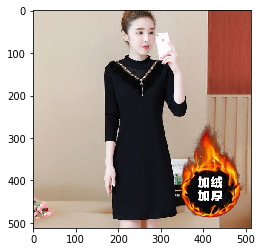

In [11]:
classify(test_images[4])